# Telco Customer Churn Data Story

## Overview

This notebook will explore and tell the story of the dataset from the Kaggle dataset [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn). 

### Questions

* Which customers are churning?
* Why are the customers churning?
* How accurately can we predict churn based on historical data?

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


`TotalCharges` should be a float64 data type.

In [4]:
# Note: This will error, but it will lead to a clue.
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [5]:
# Inspect how many rows have a blank TotalCharges value
df[df.TotalCharges == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
# Strip whitespace
df.TotalCharges = df.TotalCharges.str.strip()

In [7]:
# Convert to float64
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [8]:
# Drop nulls
df.dropna(inplace=True)

In [9]:
# Replace long categorical values for better visualizations
df.PaymentMethod.replace('Bank transfer (automatic)', 'Bank transfer', inplace=True)
df.PaymentMethod.replace('Credit card (automatic)', 'Credit card', inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Exploratory Data Analysis (EDA)

In [11]:
churned = df[df.Churn == 'Yes']
not_churned = df[df.Churn == 'No']
print(f"Churned customers     : {len(churned)}")
print(f"Non-Churned customers : {len(not_churned)}")
print(f"Total customers       : {len(df)}")
print(f"Churn %               : {(len(churned) / len(df)) * 100:.2f}%")

Churned customers     : 1869
Non-Churned customers : 5163
Total customers       : 7032
Churn %               : 26.58%


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


Notes:

* `SeniorCitizen` is 1 (Yes) or 0 (No).
* `tenure` is **months** as a customer.

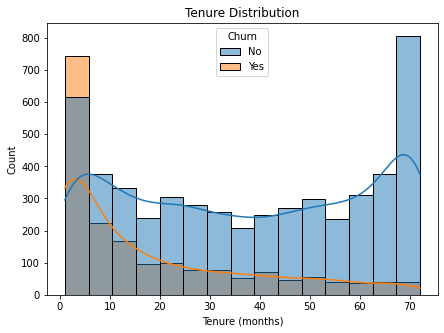

In [30]:
# Visualize the tenure (in months) distribution
fig = plt.figure(figsize=(7,5))
_ = sns.histplot(data=df, x='tenure', kde=True, hue="Churn")
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.show()
fig.savefig('./figures/churn-tenure-dist.png')

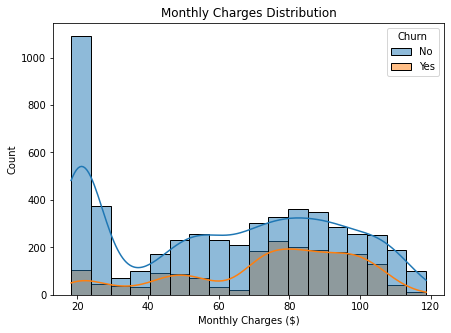

In [28]:
# Visualize the Monthly Charges distribution
fig = plt.figure(figsize=(7,5))
_ = sns.histplot(data=df, x='MonthlyCharges', kde=True, hue='Churn')
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges ($)')
plt.show()
fig.savefig('./figures/churn-MonthlyCharges-dist.png')

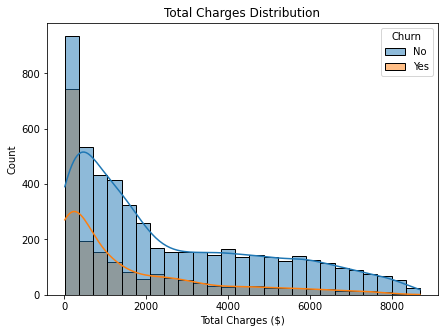

In [29]:
# Visualize the TotalCharges distribution
fig = plt.figure(figsize=(7,5))
_ = sns.histplot(data=df, x='TotalCharges', kde=True, hue="Churn")
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges ($)')
plt.show()
fig.savefig('./figures/churn-TotalCharges-dist.png')

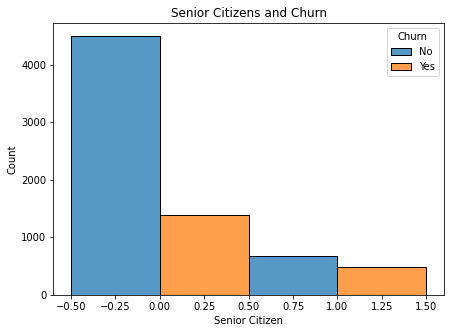

In [16]:
fig = plt.figure(figsize=(7,5))
sns.histplot(data=df, x='SeniorCitizen', hue="Churn", multiple="dodge", discrete=True)
plt.title('Senior Citizens and Churn')
plt.xlabel('Senior Citizen')
plt.show()
fig.savefig('./figures/churn-SeniorCitizen-dist.png')

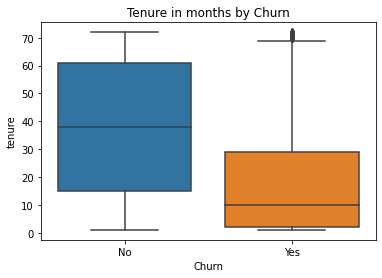

In [17]:
fig = plt.figure()
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure in months by Churn')
plt.show()
fig.savefig('./figures/churn-tenure-boxplot.png')

Almost all churn happens within the first 30 months with the median of churn happening around 10 months.

In other words, most churn happens within the first year.

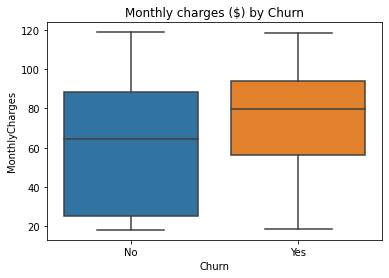

In [18]:
fig = plt.figure()
_ = sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly charges ($) by Churn')
plt.show()
fig.savefig('./figures/churn-monthlycharges-boxplot.png')

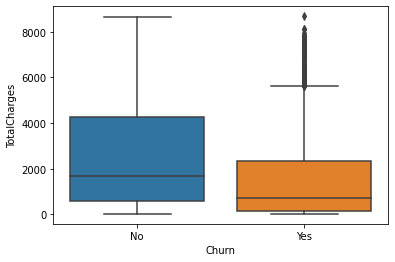

In [19]:
# NOTE: Total charges aren't overly helpful because it's obvious churned customers will have a lower lifetime value
_ = sns.boxplot(data=df, x='Churn', y='TotalCharges')

Churned customers tend to spend less in total, which makes sense.

Churned customers are spending more monthly.

In [20]:
print(f"There are {len(df.customerID.unique())} unique customer IDs.")

There are 7032 unique customer IDs.


In [21]:
# We don't want customer IDs because they are all unique
df_obj_cols = df.drop('customerID', axis=1).select_dtypes(include='object')
df_obj_cols.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [22]:
for column in df_obj_cols.columns:
    print(f"Column `{column}` has {len(df[column].unique())} unique values: {df[column].unique()}")
    print("\n")

Column `gender` has 2 unique values: ['Female' 'Male']


Column `Partner` has 2 unique values: ['Yes' 'No']


Column `Dependents` has 2 unique values: ['No' 'Yes']


Column `PhoneService` has 2 unique values: ['No' 'Yes']


Column `MultipleLines` has 3 unique values: ['No phone service' 'No' 'Yes']


Column `InternetService` has 3 unique values: ['DSL' 'Fiber optic' 'No']


Column `OnlineSecurity` has 3 unique values: ['No' 'Yes' 'No internet service']


Column `OnlineBackup` has 3 unique values: ['Yes' 'No' 'No internet service']


Column `DeviceProtection` has 3 unique values: ['No' 'Yes' 'No internet service']


Column `TechSupport` has 3 unique values: ['No' 'Yes' 'No internet service']


Column `StreamingTV` has 3 unique values: ['No' 'Yes' 'No internet service']


Column `StreamingMovies` has 3 unique values: ['No' 'Yes' 'No internet service']


Column `Contract` has 3 unique values: ['Month-to-month' 'One year' 'Two year']


Column `PaperlessBilling` has 2 unique values: ['Yes' 

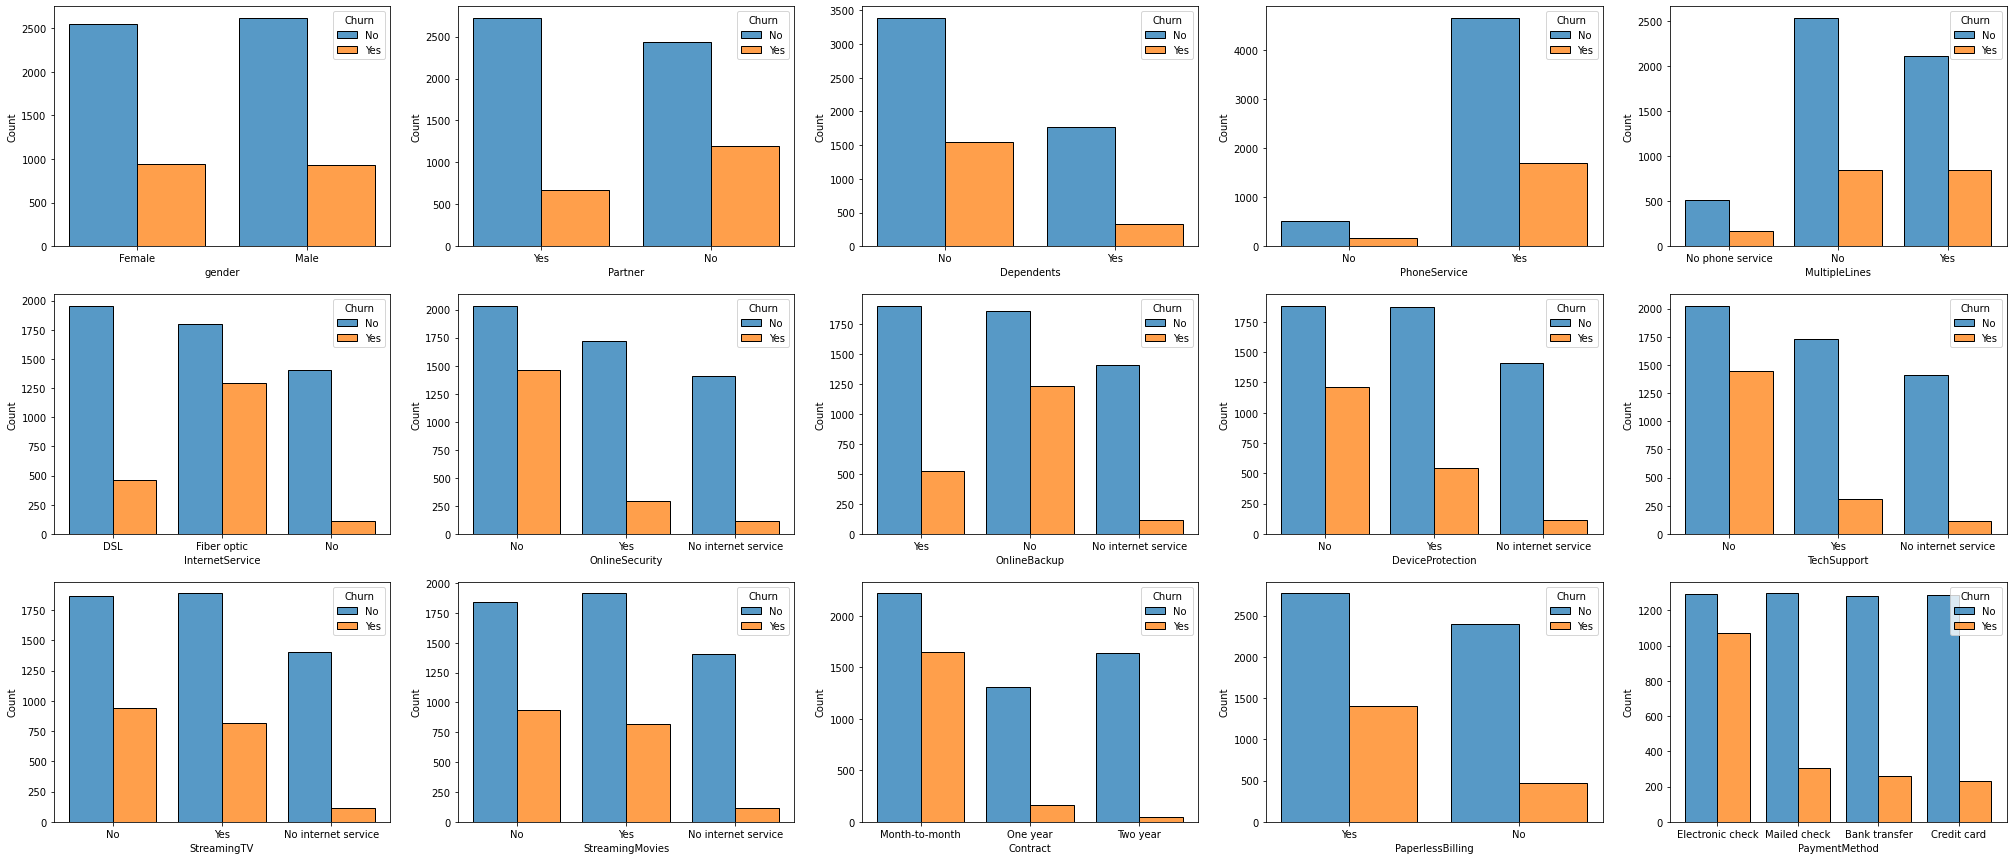

In [39]:
fig, axes = plt.subplots(3,5, figsize=(35,15))
axes_1d = axes.reshape(-1)
count = 0

for column in df_obj_cols.drop('Churn', axis=1).columns:
    sns.histplot(data=df, x=column, ax=axes_1d[count], hue='Churn', multiple="dodge", shrink=.8)
    count += 1

plt.show()
fig.savefig('./figures/churn-allcategorical-hist.png')

Some of the histogram graphs for the features show an even proportion for Churn vs No Churn. There are some which are more abnormal and worth investigating further. These include:

* PaymentMethod
* Contract
* TechSupport
* OnlineBackup
* OnlineSecurity
* InternetService

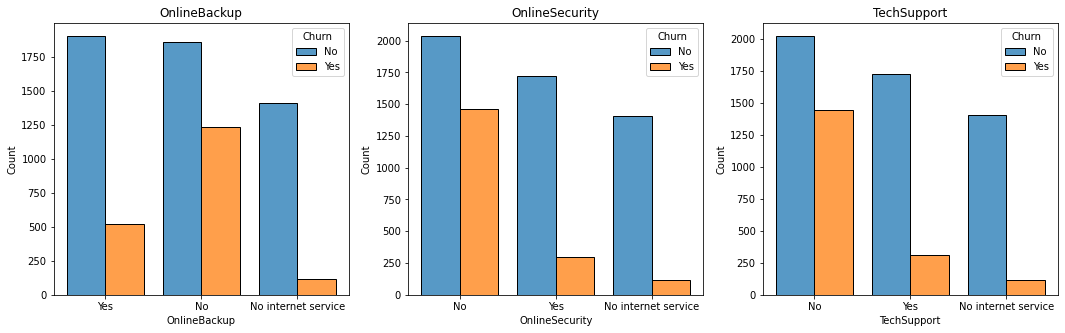

In [25]:
columns = ['OnlineBackup', 'OnlineSecurity', 'TechSupport']
fig, axes = plt.subplots(1,3, figsize=(18,5))
axes_1d = axes.reshape(-1)
count = 0

for col in columns:
    sns.histplot(data=df, x=col, hue='Churn', multiple="dodge", shrink=.8, ax=axes_1d[count])
    axes_1d[count].set_title(f"{col}")
    count += 1
    
plt.show()
fig.savefig(f'./figures/churn-features-hist.png')

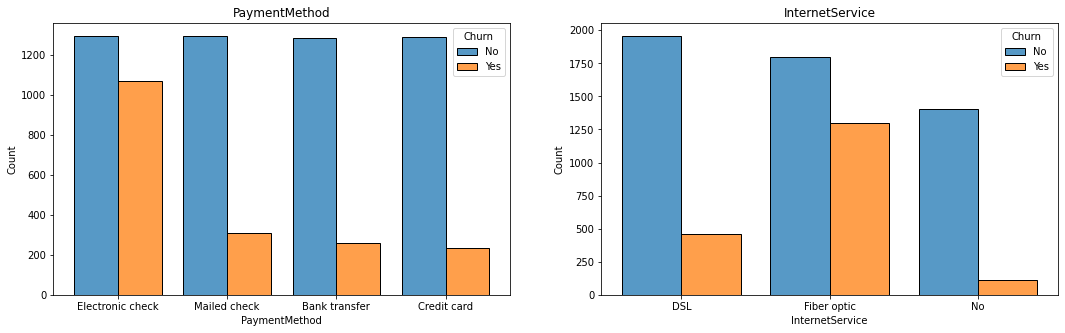

In [40]:
columns = ['PaymentMethod', 'InternetService']
fig, axes = plt.subplots(1,2, figsize=(18,5))
axes_1d = axes.reshape(-1)
count = 0

for col in columns:
    sns.histplot(data=df, x=col, hue='Churn', multiple="dodge", shrink=.8, ax=axes_1d[count])
    axes_1d[count].set_title(f"{col}")
    count += 1

plt.show()
fig.savefig(f'./figures/churn-features-problems.png')

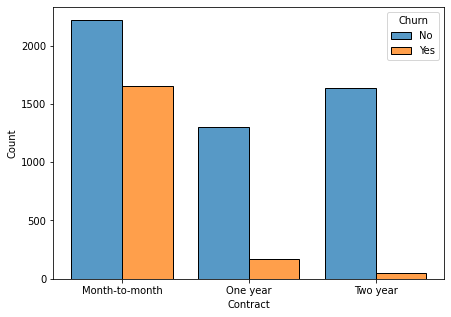

In [41]:
fig, axes = plt.subplots(1,1, figsize=(7,5))
sns.histplot(data=df, x='Contract', hue='Churn', multiple="dodge", shrink=.8, ax=axes)
plt.show()
fig.savefig(f'./figures/churn-catgrid-contract.png')

We gain the following insights about customers who have a higher churn rate:

* They tend to have Fiber optic Internet service.
* They tend to not use Online Security, Online Backup, or Tech Support features.
* They tend to pay with electronic check.
* They tend to be under month-to-month contracts.

## Next Steps

* We can use an exit survey for churned customers to gain further qualitative insight into reasons for churn.
* We can better market the Online Security, Online Backup, and Tech Support since those services tend to retain users.
* We can investigate further Fiber Optic internet service and the electronic check process for service quality issues.
* We can further user this data to build a predictive model which may be able to detect when a customer is getting ready to churn.